In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('us-counties.csv')

In [4]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df_nj = df[df['state'] == 'New Jersey']

In [6]:
df_nj.head()

,date,county,state,fips,cases,deaths
517,2020-03-04,Bergen,New Jersey,34003.0,1,0.0
563,2020-03-05,Bergen,New Jersey,34003.0,2,0.0
624,2020-03-06,Bergen,New Jersey,34003.0,3,0.0
625,2020-03-06,Camden,New Jersey,34007.0,1,0.0
712,2020-03-07,Bergen,New Jersey,34003.0,3,0.0


In [7]:
#df_nj['year'], df_nj['month'], df_nj['day'] = zip(*df_nj['date'].map(lambda x: (x.strftime('%Y'), x.strftime('%B'), x.strftime('%d'))))
df_nj['year-month'], df_nj['day'] = zip(*df_nj['date'].map(lambda x: (x.strftime('%Y-%B'), x.strftime('%d'))))

c:\users\wadekars\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
df_nj.head()

,date,county,state,fips,cases,deaths,year-month,day
517,2020-03-04,Bergen,New Jersey,34003.0,1,0.0,2020-March,04
563,2020-03-05,Bergen,New Jersey,34003.0,2,0.0,2020-March,05
624,2020-03-06,Bergen,New Jersey,34003.0,3,0.0,2020-March,06
625,2020-03-06,Camden,New Jersey,34007.0,1,0.0,2020-March,06
712,2020-03-07,Bergen,New Jersey,34003.0,3,0.0,2020-March,07


In [9]:
df_nj_counties = df_nj.groupby(['county', 'year-month']).agg({'cases':np.max})

In [10]:
df_nj_counties = df_nj.groupby(['county', 'year-month']).agg({'cases':np.max, 'deaths': np.max})

In [11]:
df_nj_counties.head()

cases  deaths
county   year-month                  
Atlantic 2020-April       964    41.0
         2020-August     3763   254.0
         2020-December  12200   368.0
         2020-July       3379   250.0
         2020-June       2877   216.0

In [12]:
df_nj_sum = df_nj_counties.groupby('year-month').agg({'cases':np.sum})

In [13]:
df_nj_sum = df_nj_counties.groupby('year-month').agg({'cases':np.sum, 'deaths':np.sum})

In [14]:
df_nj_sum.head()

,cases,deaths
year-month,,
2020-April,123040,7242.0
2020-August,194373,15992.0
2020-December,479453,19042.0
2020-July,183688,15942.0
2020-June,173825,15037.0


In [15]:
pd.to_datetime(df_nj_sum.index)

DatetimeIndex(['2020-04-01', '2020-08-01', '2020-12-01', '2020-07-01',
               '2020-06-01', '2020-03-01', '2020-05-01', '2020-11-01',
               '2020-10-01', '2020-09-01', '2021-04-01', '2021-02-01',
               '2021-01-01', '2021-03-01'],
              dtype='datetime64[ns]', name='year-month', freq=None)

In [16]:
df_nj_sum.index = pd.to_datetime(df_nj_sum.index)

In [17]:
df_nj_sum.sort_index(inplace=True)

In [18]:
df_nj_sum.index = df_nj_sum.index.strftime('%Y-%B')

In [19]:
df_nj_sum

,cases,deaths
year-month,,
2020-March,18853,288.0
2020-April,123040,7242.0
2020-May,160777,11699.0
2020-June,173825,15037.0
2020-July,183688,15942.0
2020-August,194373,15992.0
2020-September,207082,16132.0
2020-October,239679,16351.0
2020-November,340830,16994.0


In [20]:
#df_nj_sum[df_nj_sum.index == pd.to_datetime(df_nj_sum.index).sort_values()]

In [21]:
df_nj_sum.head()

,cases,deaths
year-month,,
2020-March,18853,288.0
2020-April,123040,7242.0
2020-May,160777,11699.0
2020-June,173825,15037.0
2020-July,183688,15942.0


In [22]:
#df_nj_sum.index = pd.to_datetime(df_nj_sum.index).sort_values()

<IPython.core.display.Javascript object>


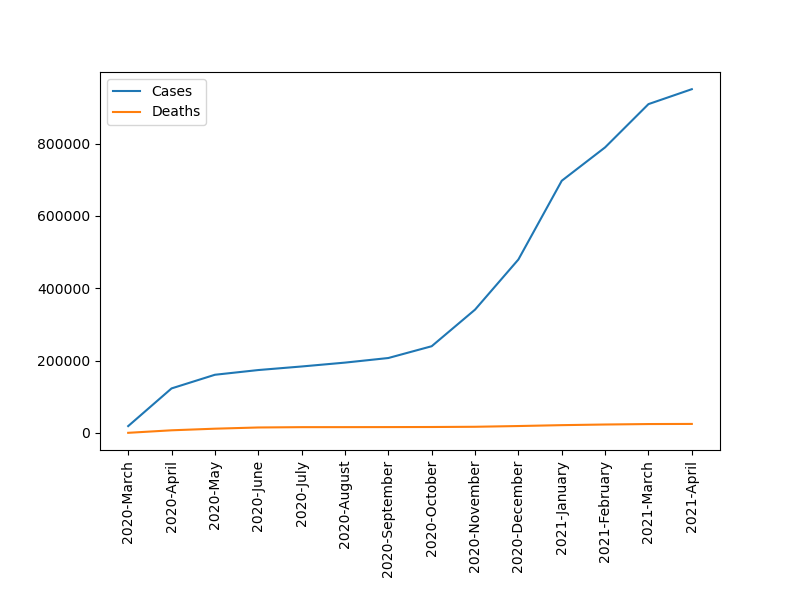

In [23]:
plt.figure(figsize=(8,6))
plt.plot(df_nj_sum.index, df_nj_sum['cases'], label='Cases')
plt.plot(df_nj_sum.index, df_nj_sum['deaths'], label='Deaths')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)
plt.legend(loc='best')

<IPython.core.display.Javascript object>


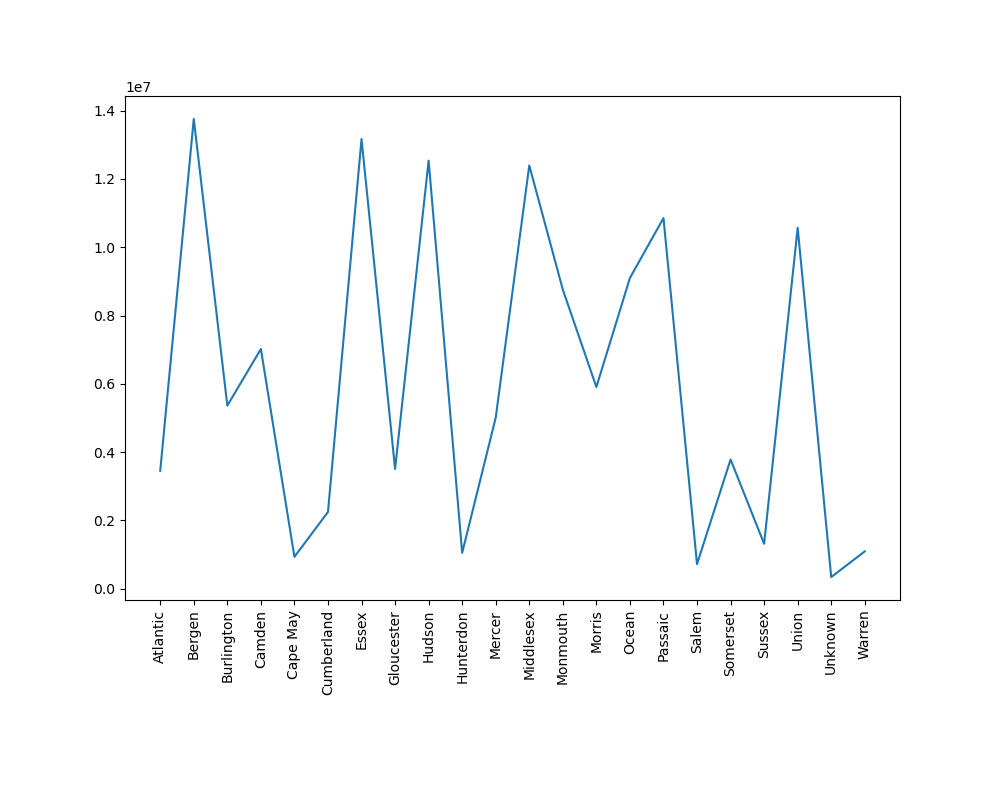

In [24]:
plt.figure(figsize=(10,8))
plt.plot(df_nj.groupby('county').agg({'cases':np.sum}).index, df_nj.groupby('county').agg({'cases':np.sum})['cases'])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.25)

In [25]:
df_nj.groupby('county').agg({'cases':np.sum})

,cases
county,
Atlantic,3451967
Bergen,13757025
Burlington,5360549
Camden,7018732
Cape May,933314
Cumberland,2247085
Essex,13168306
Gloucester,3507066
Hudson,12536151
